In [334]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl

In [335]:
#checking the versions of the imported libraries
np.__version__,pd.__version__,sns.__version__,matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

In [336]:
#loading the data file
df=pd.read_csv('D:\ML\Cars Price Prediction Project\Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [337]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [338]:
df.shape

(8128, 13)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [340]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [341]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [342]:
#creating a boolean series from isin()
mask = df['fuel'].isin(['CNG','LPG'])
#select all the rows except cng and lpg
df = df [~mask]
df

#unique values in the fuel column after removal of cng anf lpg
df.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

In [343]:
#dropping torque column
df.drop(['torque'], axis=1, inplace = True)

In [344]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
dtype: object

LABEL ENCODING

In [345]:
#replacing the owner values to 1,2,3,4
df['owner'] = df['owner'].replace(
    to_replace=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],
    value=['1', '2', '3','4'])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [346]:
#converting the column 'name' to 'brand'
df.rename(columns={'name':'brand'}, inplace = True)

In [347]:
#shortening the brand name by keeping the first part of the name only
df['brand']=df['brand'].str.split().str[0]
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [348]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['brand']= label_encoder.fit_transform(df['brand'])
df['seller_type']= label_encoder.fit_transform(df['seller_type'])
df['fuel']= label_encoder.fit_transform(df['fuel'])
df['transmission']= label_encoder.fit_transform(df['transmission'])


In [349]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,27,2014,370000,120000,0,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,10,2006,158000,140000,1,1,1,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,11,2010,225000,127000,0,1,1,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,20,2007,130000,120000,1,1,1,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,11,2013,320000,110000,1,1,1,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,11,2007,135000,119000,0,1,1,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,20,2009,382000,120000,0,1,1,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,28,2013,290000,25000,0,1,1,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [350]:
#extracting only the numeric part of the columns and converting to float datatype
df['mileage']= df['mileage'].str.split().str[0].astype(float)
df['engine']= df['engine'].str.split().str[0].astype(float)
df['max_power']= df['max_power'].str.split().str[0].astype(float)

In [351]:
df.dtypes

brand              int32
year               int64
selling_price      int64
km_driven          int64
fuel               int32
seller_type        int32
transmission       int32
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [352]:
df.owner.unique()
df = df.drop(df[df['owner'] == 'Test Drive Car'].index)

In [353]:
df.seats.unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [354]:
y = np.log(df['selling_price'])
df['selling_price']=np.log(df['selling_price'])
#df['km_driven']=np.log(df['km_driven'])

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [355]:
# Import label encoder
#from sklearn import preprocessing
#from sklearn.preprocessing import LabelEncoder

#perform label encoding across team, position, and all_star columns
#df[["brand", "fuel", "seller_type", "transmission"]] = df[["brand", "fuel", "seller_type", "transmission"]].apply(LabelEncoder().fit_transform)
#view udpated DataFrame
#print(df)

In [356]:
df.describe()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8028.000000,8.028000e+03,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,18.004235,2013.815521,12.979337,6.977314e+04,0.451794,0.890010,0.869706,19.391962,1462.914640,91.819726,5.421551
std,7.388504,4.030836,0.838039,5.664419e+04,0.497702,0.395861,0.336648,4.001972,504.759742,35.804513,0.963125
min,0.000000,1983.000000,10.308919,1.000000e+03,0.000000,0.000000,0.000000,0.000000,624.000000,0.000000,2.000000
25%,11.000000,2011.000000,12.468437,3.500000e+04,0.000000,1.000000,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,20.000000,2015.000000,13.017003,6.000000e+04,0.000000,1.000000,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,20.000000,2017.000000,13.429848,9.800000e+04,1.000000,1.000000,1.000000,22.320000,1582.000000,102.000000,5.000000
max,31.000000,2020.000000,16.118096,2.360457e+06,1.000000,2.000000,1.000000,42.000000,3604.000000,400.000000,14.000000


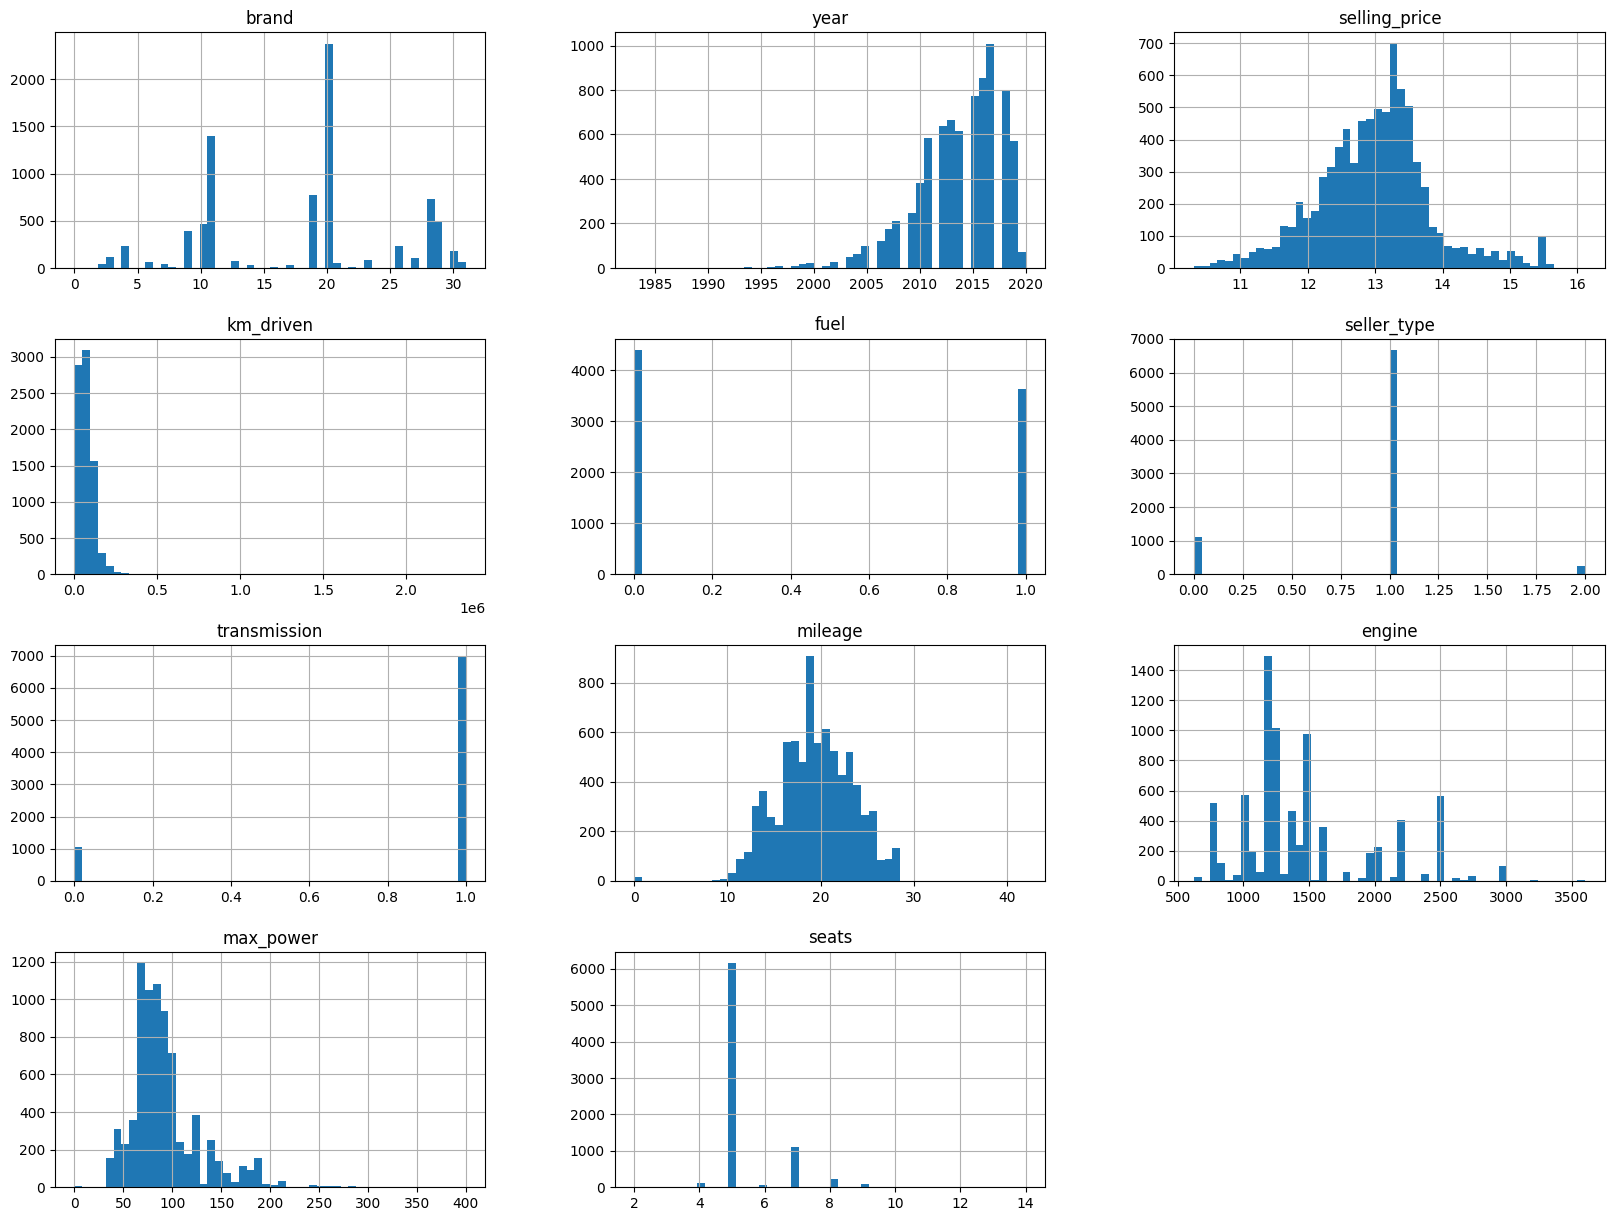

In [357]:
#Plotting Histogram
# plotting histograms for all attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='brand', ylabel='count'>

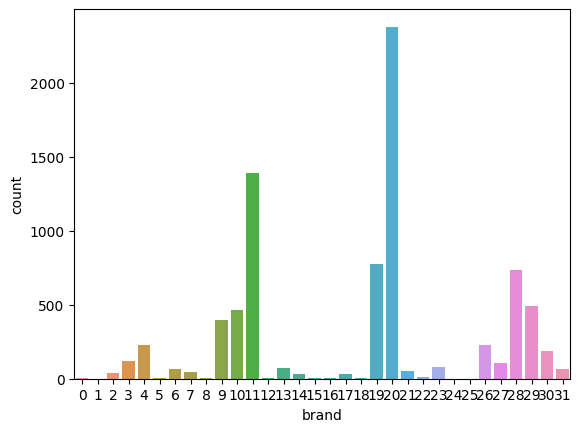

In [358]:
# How many cars of a certain brand?
sns.countplot(data = df, x = 'brand')

Text(0.5, 0, 'Owner')

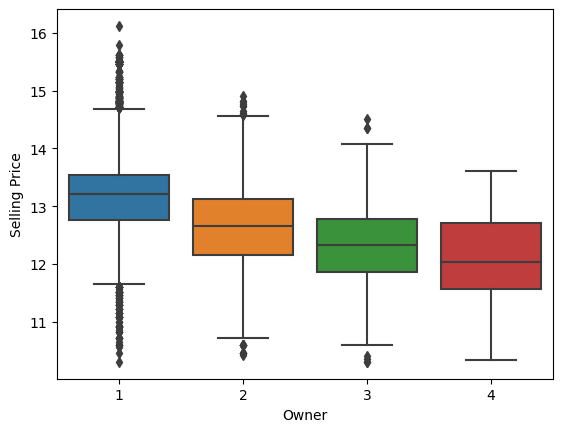

In [359]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

<Axes: xlabel='mileage', ylabel='km_driven'>

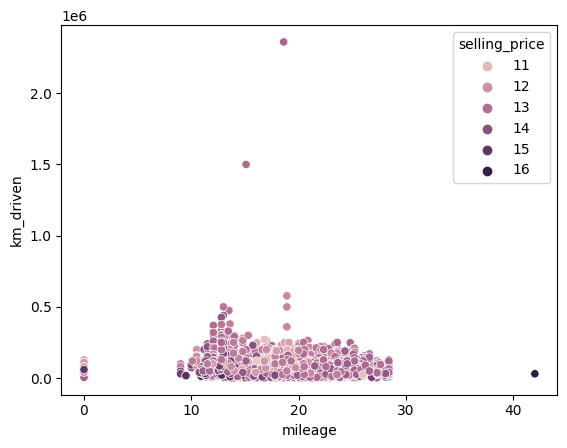

In [360]:
sns.scatterplot(x = df['mileage'], y = df['km_driven'], hue=df['selling_price'])

<Axes: xlabel='selling_price', ylabel='Density'>

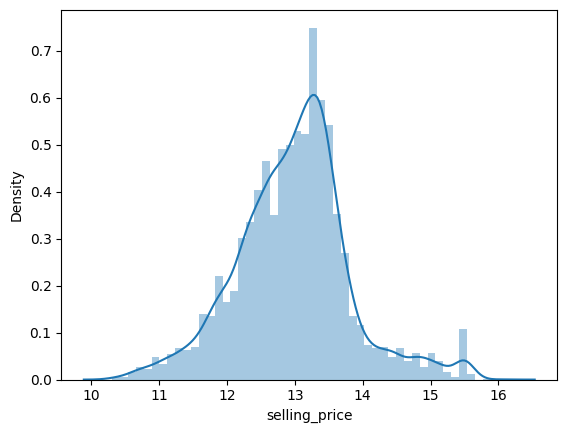

In [361]:
sns.distplot(df['selling_price'])

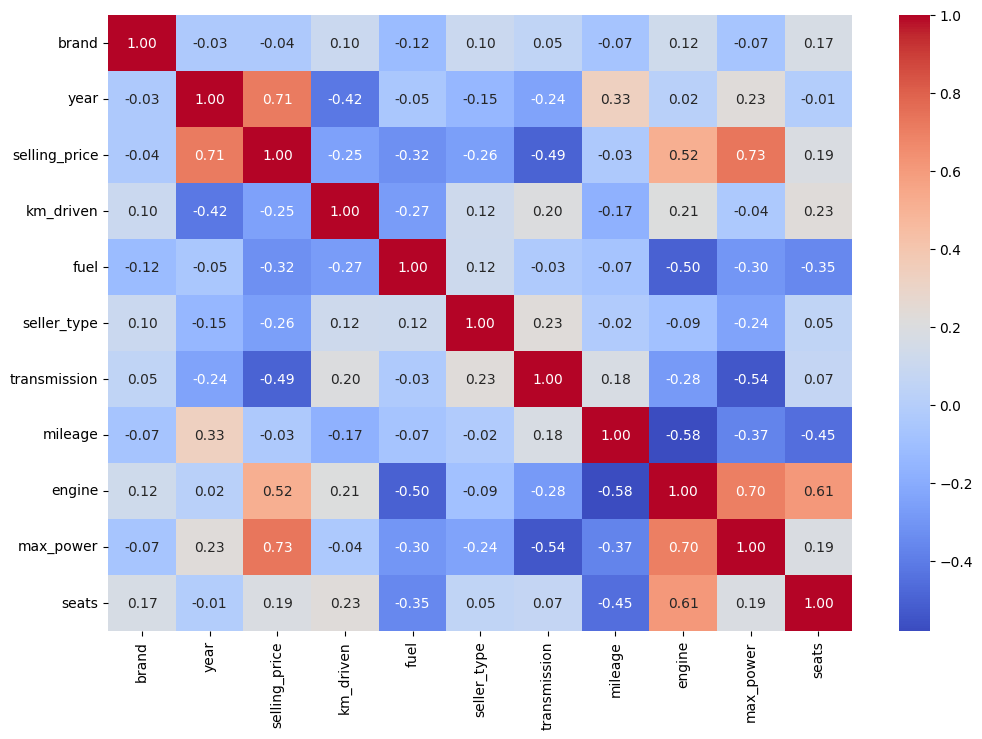

In [362]:
df = df.select_dtypes(exclude=[object])
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt ='.2f')
plt.show()

Based on the correlation matrix, we can see that year,km_driven,engine and max_power are the best features that can be used for predicting the selling_price since they have high correlation.

<Axes: xlabel='x', ylabel='y'>

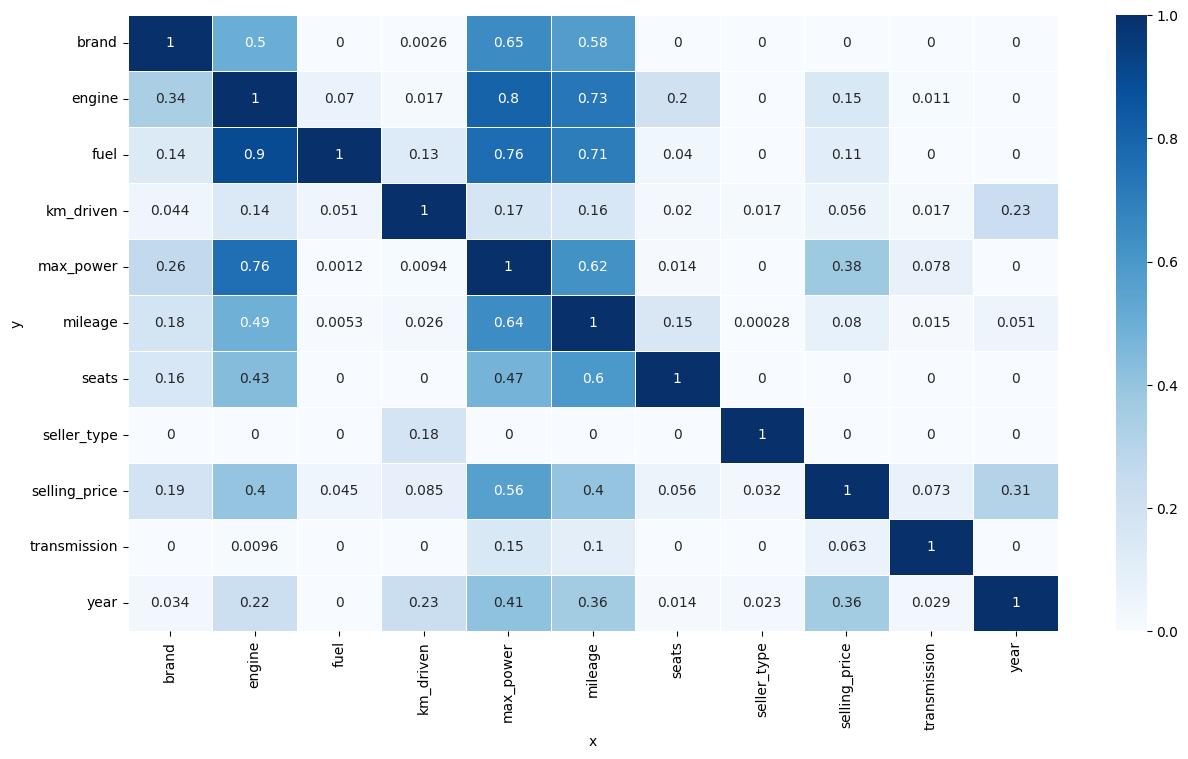

In [363]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

FEATURE SELECTION

In [364]:
#x is our strong features based on the heatmap
X = df[['year','engine','mileage','max_power']]

#y is simply the target we want to estimate
y = df["selling_price"]

TRAIN TEST SPLIT

In [365]:
#splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)


In [366]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


PREPROCESSING

In [367]:
#checking for null values in train dataset
X_train[['year','mileage','engine','max_power']].isna().sum()

year           0
mileage      154
engine       154
max_power    149
dtype: int64

In [368]:
#checking in test dataset for null values
X_test[['year','mileage','engine','max_power']].isna().sum()

year          0
mileage      60
engine       60
max_power    59
dtype: int64

In [369]:
#checking for null values in y_train
y_train.isna().sum()

0

In [370]:
#checking in y_test for null values
y_test.isna().sum()

0

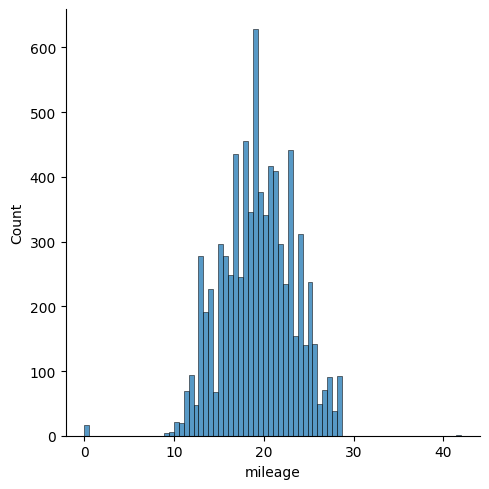

In [371]:
#using the distribution plot to determine what to use for missingvalues replacement(for deciding between mean,median and mode)
sns.displot(data=df, x='mileage')

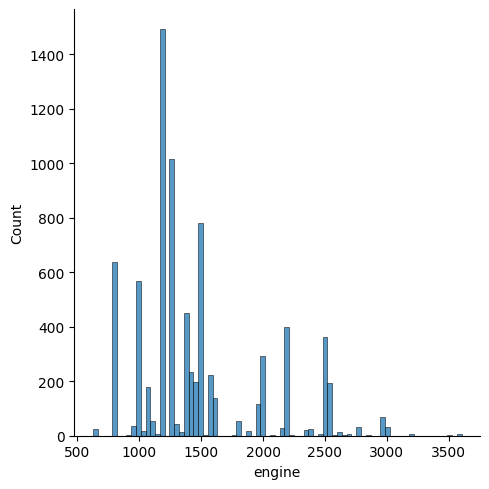

In [372]:
sns.displot(data=df, x='engine')

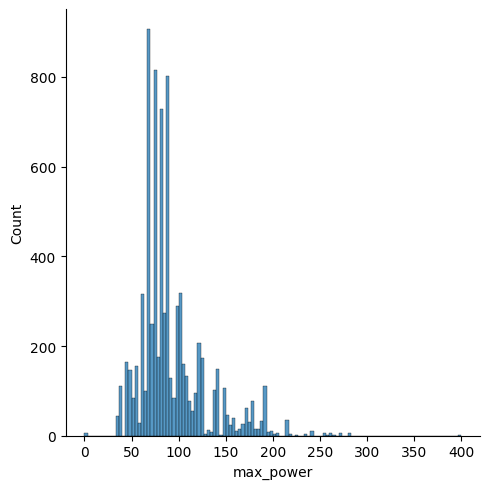

In [373]:
sns.displot(data=df, x='max_power')

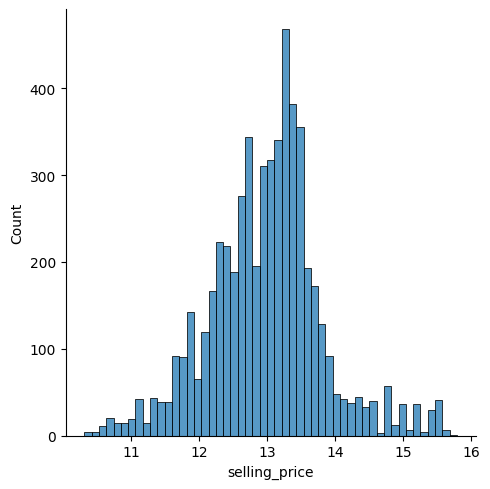

In [374]:
sns.displot(y_train)

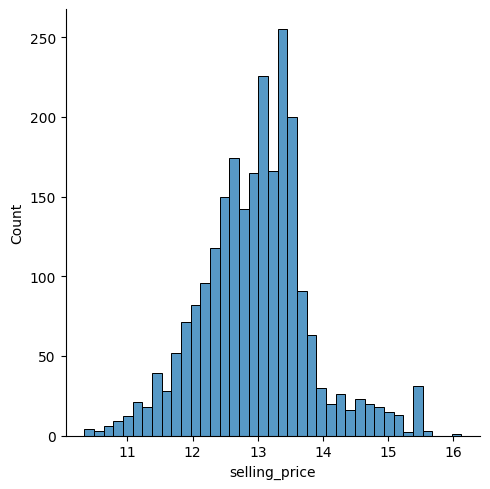

In [375]:
sns.displot(y_test)

since y_test and y_train doesn't have null data, no need to imputate the data

In [376]:
#let's fill the test set first!
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)

In [377]:
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [378]:
X_test[['mileage', 'engine','max_power']].isna().sum()

mileage      0
engine       0
max_power    0
dtype: int64

In [379]:
X_train[['mileage', 'engine','max_power']].isna().sum()

mileage      0
engine       0
max_power    0
dtype: int64

FEATURE SCALING

In [380]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [381]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [382]:
#from sklearn.linear_model import LinearRegression  #we are using regression models
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#model.fit(X_train, y_train)

In [383]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
#print(yhat)
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10291878644612094
r2:  0.8537226950205956


CROSS-VALIDATION AND GRID SEARCH

In [384]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [385]:
y_train.isna().sum()


0

In [386]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.10200994 -0.10843093 -0.10258305 -0.10008568 -0.10893769]; Mean: -0.10440945874003915


SVR - Score: [-0.07575402 -0.07351245 -0.08216012 -0.06901785 -0.07521293]; Mean: -0.07513147441620455
KNeighbors Regressor - Score: [-0.06696574 -0.06562287 -0.05552616 -0.06250073 -0.05473145]; Mean: -0.0610693880641774
Decision-Tree Regressor - Score: [-0.0600271  -0.0697535  -0.070465   -0.06222459 -0.05999374]; Mean: -0.06449278636134034
Random-Forest Regressor - Score: [-0.05777588 -0.05168878 -0.04940846 -0.05298908 -0.05908659]; Mean: -0.054189757383391345


In [387]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

GRID SEARCH

In [388]:
grid.best_params_


{'bootstrap': True, 'max_depth': None, 'n_estimators': 13}

In [389]:
# Find your grid_search's best score
best_mse = grid.best_score_

TESTING

In [390]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.050096350026803536

best_mse  # ignore the minus because it's neg_mean_squared_error

FEATURE IMPORTANCE ANALYSIS

In [391]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.4701017 , 0.08529574, 0.03552955, 0.40907301])

<BarContainer object of 4 artists>

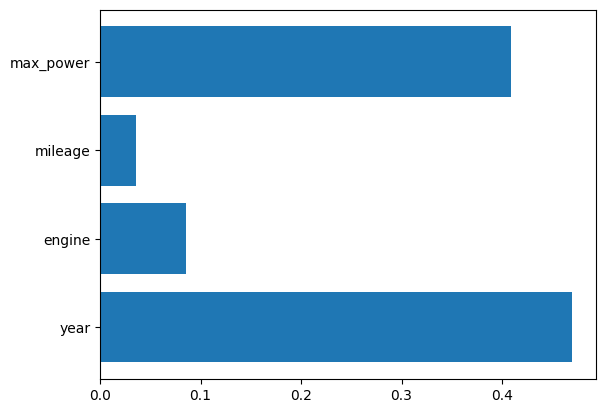

In [392]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

PERMUTATION WAY

Text(0.5, 0, 'Random Forest Feature Importance')

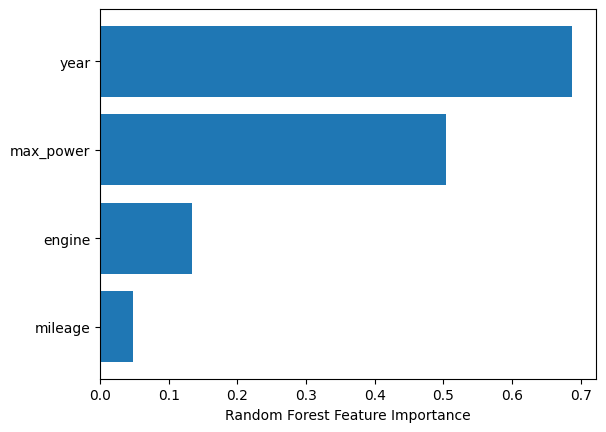

In [393]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

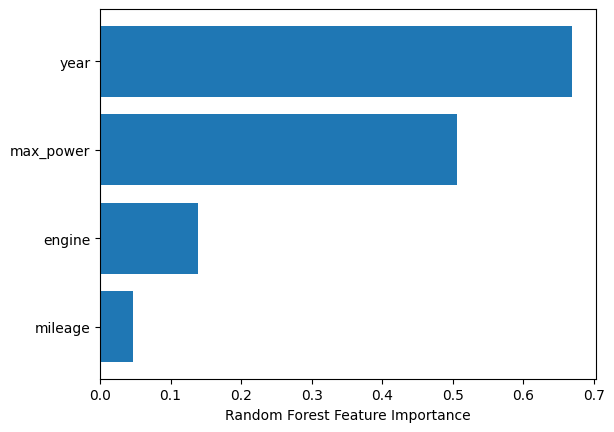

In [394]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

INFERENCE

In [395]:
import pickle

# save the model to disk
filename = 'car-price.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [396]:
pickled_model = pickle.load(open('car-price.pkl', 'rb'))